## Jupyter notebook for data analysis

This is the jupyter notebook that performs the data analysis of the LLM responses and used to generate all the data and plots used in the paper.  It should run once you have python3 installed with the matplotlib, numpy and pandas dependencies installed.

In [42]:
import pandas
from matplotlib import pyplot as plt
import numpy as np
import utils

## Set t = 1 and run the entire notebook to generate results for MCTD 
## Set t = 2 for SLE
## Set t = 3 for JDM
## Set t = 4 for SSc

t = 4 # run all results for systemic sclerosis


In [43]:
if t == 1:
    disease='MCTD'
    disease_fullname = 'Mixed Connective Tissue Disease'
    symp_types=['formal', 'informal']
    model_names = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet' ]
    keywords_list = ['mctd', 'mixed connective tissue disease']

In [44]:
if t == 2:
    disease='SLE'
    disease_fullname = 'Systemic Lupus Erythematosus' 
    symp_types=['formal', 'informal']
    model_names = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet' ]
    keywords_list = ['sle','lupus','systemic lupus erythematosus']

In [45]:
if t == 3:
    disease='JDM'
    disease_fullname = 'Juvenile Dermatomyositis'
    symp_types=['formal', 'informal']
    model_names = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet' ]
    keywords_list=['jdm', 'dermatomyositis']


In [46]:
if t == 4:
    disease='SystemicSclerosis'
    disease_fullname = 'Systemic Sclerosis'
    symp_types=['formal', 'informal']
    model_names = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet' ]
    keywords_list =  ['sclerosis','scleroderma']

In [47]:
all_diseases = ['SLE','SystemicSclerosis', 'JDM', 'MCTD']
all_types = ['formal', 'informal']
all_models = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet']
all_keywords = [ ['sle','lupus','systemic lupus erythematosus' ], 
                 ['sclerosis','scleroderma' ], 
                 [ 'jdm', 'dermatomyositis'], 
                 ['mctd', 'mixed connective tissue disease'] ]

In [48]:
top = {}
top_three = {}
top_five = {}

for s in symp_types:
    for m in model_names:
        fname = f'data/{disease}-{s}-{m}.txt'
        all_patients = utils.process_file(fname)
        top_symptom = sum([(1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(1)) else 0) for p in all_patients])
        top_three_symptom = sum([(1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(3)) else 0) for p in all_patients])
        top_five_symptom = sum([(1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(5)) else 0) for p in all_patients])
        n = len(all_patients)
        top[(s, m)] = top_symptom/n
        top_three[(s,m)] = top_three_symptom/n
        top_five[(s,m)] = top_five_symptom/n

In [49]:
bar_order = [(s,t) for s in symp_types for t in model_names]
print(bar_order)

[('formal', 'chatgpt-3.5'), ('formal', 'chatgpt-4o'), ('formal', 'claude-3-opus'), ('formal', 'claude-3.5-sonnet'), ('informal', 'chatgpt-3.5'), ('informal', 'chatgpt-4o'), ('informal', 'claude-3-opus'), ('informal', 'claude-3.5-sonnet')]


In [50]:
df_error = pandas.read_csv('results/error_bars_data.csv')

print(f'condition: {disease}')
# Now restrict to just the disease we care about
display(df_error[df_error['condition'] == disease] )

def get_accuracies_and_error_bars(bar_order):
    mod_disease = 'SSc' if (disease == 'SystemicSclerosis') else disease 
   # for (s, t) in bar_order:
   #     print(s, t)
   #     display(df_error.loc[ ((df_error['condition'] == mod_disease) & (df_error['type'] == s) & ( df_error['model'] == t) & (df_error['diagnosis'] == 3)), 'prob'].values[0])
    
    prob_series_formal3 = [ (df_error.loc[ ((df_error['condition'] == mod_disease) & (df_error['type'] == s) & ( df_error['model'] == t) & (df_error['diagnosis'] == 3)), 'mean']).values[0] for (s, t) in bar_order]
    lower_ci_series_formal3 = [ (df_error.loc[ ((df_error['condition'] == mod_disease) & (df_error['type'] == s) & ( df_error['model'] == t) & (df_error['diagnosis'] == 3)), 'lower_ci']).values[0] for (s, t) in bar_order]
    upper_ci_series_formal3 =  [ (df_error.loc[ ((df_error['condition'] == mod_disease) & (df_error['type'] == s) & ( df_error['model'] == t) & (df_error['diagnosis'] == 3)), 'upper_ci']).values[0] for (s, t) in bar_order]
    err_series_formal3 = [ lower_ci_series_formal3, upper_ci_series_formal3]
    prob_series_formal5 = [ (df_error.loc[ ((df_error['condition'] == mod_disease) & (df_error['type'] == s) & ( df_error['model'] == t) & (df_error['diagnosis'] == 5)), 'mean']).values[0] for (s, t) in bar_order]
    lower_ci_series_formal5 = [ (df_error.loc[ ((df_error['condition'] == mod_disease) & (df_error['type'] == s) & ( df_error['model'] == t) & (df_error['diagnosis'] == 5)), 'lower_ci']).values[0] for (s, t) in bar_order]
    upper_ci_series_formal5 =  [ (df_error.loc[ ((df_error['condition'] == mod_disease) & (df_error['type'] == s) & ( df_error['model'] == t) & (df_error['diagnosis'] == 5)), 'upper_ci']).values[0] for (s, t) in bar_order]
    err_series_formal5 = [ lower_ci_series_formal5, upper_ci_series_formal5]
                          
    return ( prob_series_formal3, err_series_formal3, prob_series_formal5,  err_series_formal5) 


( prob_series_formal3, err_series_formal3, prob_series_formal5,  err_series_formal5)  = get_accuracies_and_error_bars(bar_order)
#print(prob_series_formal3)

condition: SystemicSclerosis


,condition,type,model,diagnosis,n,mean,se,lower,upper,prob,lower_ci,upper_ci


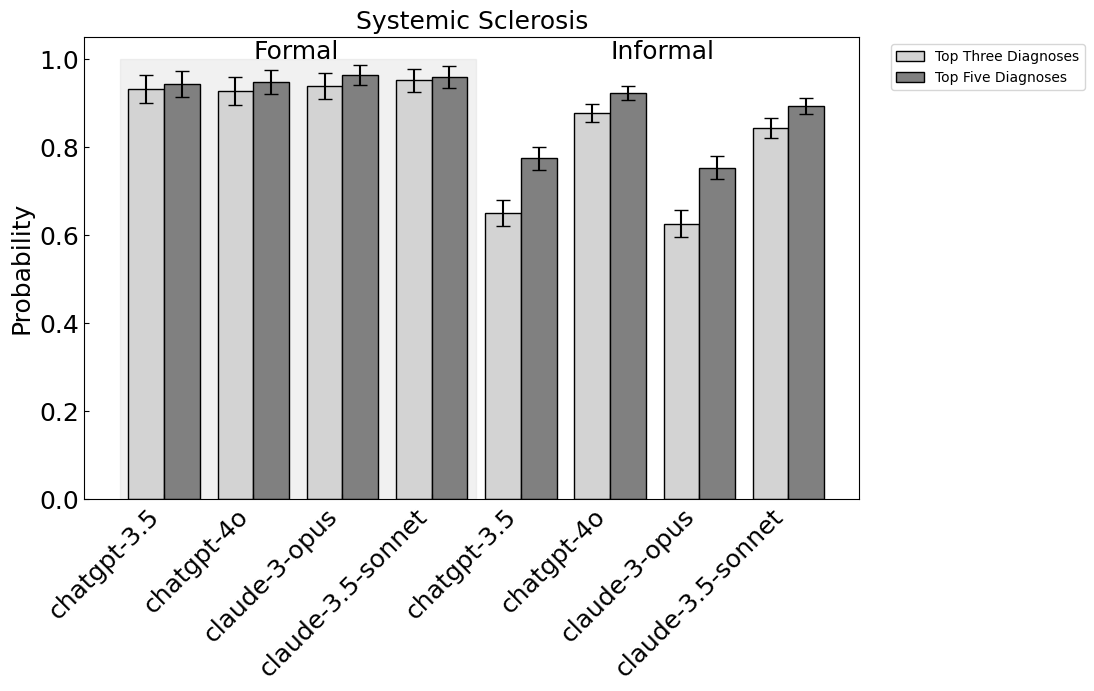

In [51]:
from matplotlib.patches import Rectangle
x = [f'{m}' for (s,m) in bar_order]
top_accuracies = [top[tup] for tup in bar_order]
top_three_accuracies = prob_series_formal3 # [top_three[tup] for tup in bar_order]
top_five_accuracies =  prob_series_formal5 #[top_five[tup] for tup in bar_order]
top_three_errors = err_series_formal3
top_five_errors = err_series_formal5 
X_axis = np.arange(len(top_three_accuracies)) 
  

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.axvspan(-0.5, 3.5, color='lightblue', alpha=0.3)

 
rect = Rectangle(
    (-0.5, 0),  # Start position (x, y) for the shaded region
    4,  # Width to cover the first half of the bars
    1.0,  # Height to cover the bars fully
    color='lightgray',  # Background color
    alpha=0.3,  # Transparency
    hatch='',  # Hatching pattern
    zorder=0  # Place behind the bars
)
ax.add_patch(rect)

# getting rid of top diagnosis
#bar1 = ax.bar(X_axis - 0.2, top_accuracies, 0.2, label = f'Top Diagnosis', edgecolor='black', color='white') 
# getting rid of to top three
bar2 = ax.bar(X_axis-0.2, top_three_accuracies,  0.4, yerr=err_series_formal3, label = f'Top Three Diagnoses', edgecolor='black', color='lightgray', capsize=5)
bar3 = ax.bar(X_axis+0.2, top_five_accuracies,  0.4, yerr=err_series_formal5, label = f'Top Five Diagnoses', edgecolor='black', color='gray', capsize=5)

# Color the first half differently
# Getting rid of top and top three, just plot top 5.
#for i, bar in enumerate(bar1):
#    if i <= 3:
#        #bar.set_color('lightblue')
#        bar.set_edgecolor('black')
    #bar.set_hatch('\\')
    
# Color the first half differently
for i, bar in enumerate(bar2):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('//')

# Color the first half differently
for i, bar in enumerate(bar3):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('-')



plt.xticks(X_axis, x, rotation=45, ha='right')  
plt.ylabel("Probability",fontsize=18) 
plt.title(f"{disease_fullname}",fontsize=18) 
plt.legend(bbox_to_anchor=(1.3, 1))
plt.tick_params(direction='in')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)  # Set font size for y-axis ticks

ax.text(1,1.0,'Formal',fontsize=18)
ax.text(5,1.0,'Informal', fontsize=18)
plt.savefig(f'results/{disease}-diagnosis-accuracies.pdf', bbox_inches='tight', dpi=500)
plt.show() 

[np.float64(0.9314516129032258), np.float64(0.9274193548387096), np.float64(0.6503006012024048), np.float64(0.8767535070140281)]
[[np.float64(0.031512754), np.float64(0.032356094), np.float64(0.029601452), np.float64(0.020404903)], [np.float64(0.031512754), np.float64(0.032356094), np.float64(0.029601452), np.float64(0.020404903)]]


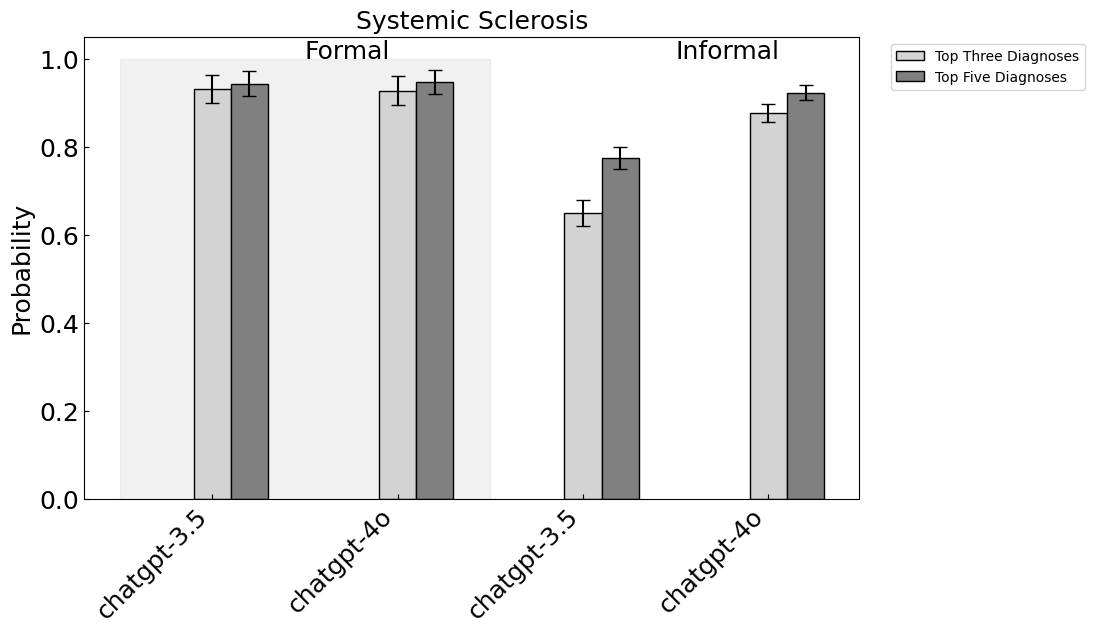

In [52]:
from matplotlib.patches import Rectangle

# Generate only top 5 for Chatgpt

bar_order_new = [(s,m) for (s,m) in bar_order if 'chatgpt' in m]
(prob_series_formal3, err_series_formal3, prob_series_formal5, err_series_formal5) = get_accuracies_and_error_bars(bar_order_new)
print(prob_series_formal3)
print(err_series_formal3)

x = [f'{m}' for (s,m) in bar_order_new ]

#top_accuracies = [top[tup] for tup in bar_order_new ]
top_three_accuracies = prob_series_formal3 #[top_three[tup] for tup in bar_order_new ]
top_five_accuracies = prob_series_formal5 #[top_five[tup] for tup in bar_order_new ]
X_axis = np.arange(len(top_three_accuracies)) 
  

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.axvspan(-0.5, 3.5, color='lightblue', alpha=0.3)

 
rect = Rectangle(
    (-0.5, 0),  # Start position (x, y) for the shaded region
    2,  # Width to cover the first half of the bars
    1.0,  # Height to cover the bars fully
    color='lightgray',  # Background color
    alpha=0.3,  # Transparency
    hatch='',  # Hatching pattern
    zorder=0  # Place behind the bars
)
ax.add_patch(rect)

# getting rid of top diagnosis
#bar1 = ax.bar(X_axis - 0.2, top_accuracies, 0.2, label = f'Top Diagnosis', edgecolor='black', color='white') 
# getting rid of to top three
bar2 = ax.bar(X_axis, top_three_accuracies, 0.2, label = f'Top Three Diagnoses', yerr=err_series_formal3, capsize=5, edgecolor='black', color='lightgray')
bar3 = ax.bar(X_axis+0.2, top_five_accuracies, 0.2, label = f'Top Five Diagnoses', yerr=err_series_formal5, capsize=5, edgecolor='black', color='gray')

# Color the first half differently
# Getting rid of top and top three, just plot top 5.
#for i, bar in enumerate(bar1):
#    if i <= 3:
#        #bar.set_color('lightblue')
#        bar.set_edgecolor('black')
#    #bar.set_hatch('\\')
    
# Color the first half differently
for i, bar in enumerate(bar2):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('//')

# Color the first half differently
for i, bar in enumerate(bar3):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('-')



plt.xticks(X_axis, x, rotation=45, ha='right')  
plt.ylabel("Probability",fontsize=18) 
plt.title(f"{disease_fullname}",fontsize=18) 
plt.legend(bbox_to_anchor=(1.3, 1))
plt.tick_params(direction='in')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)  # Set font size for y-axis ticks

ax.text(0.5,1.0,'Formal',fontsize=18)
ax.text(2.5,1.0,'Informal', fontsize=18)
plt.savefig(f'results/{disease}-diagnosis-accuracies-chatgpt.pdf', bbox_inches='tight', dpi=500)
plt.show() 

[np.float64(0.939516129032258), np.float64(0.9516129032258064), np.float64(0.626252505), np.float64(0.843687375)]
[[np.float64(0.029728945), np.float64(0.026761012), np.float64(0.030031179), np.float64(0.0225422)], [np.float64(0.029728945), np.float64(0.026761012), np.float64(0.030031179), np.float64(0.0225422)]]


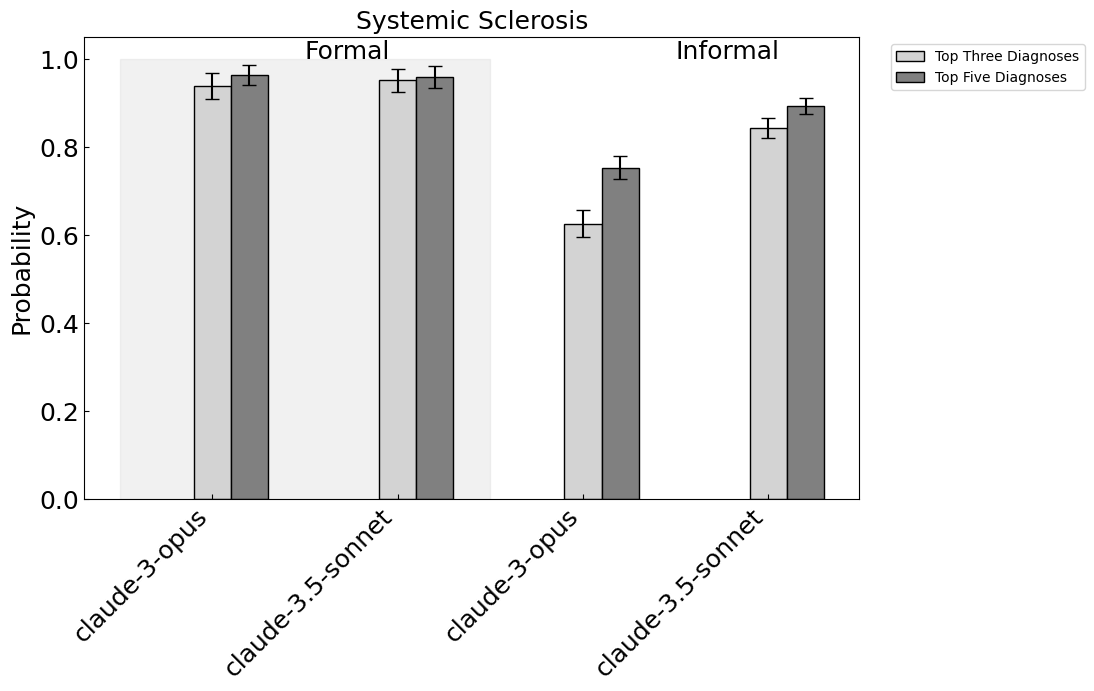

In [53]:
from matplotlib.patches import Rectangle

# Generate only top 5 for Chatgpt

bar_order_new = [(s,m) for (s,m) in bar_order if 'claude' in m]

x = [f'{m}' for (s,m) in bar_order_new ]

(prob_series_formal3, err_series_formal3, prob_series_formal5, err_series_formal5) = get_accuracies_and_error_bars(bar_order_new)
print(prob_series_formal3)
print(err_series_formal3)

x = [f'{m}' for (s,m) in bar_order_new ]

#top_accuracies = [top[tup] for tup in bar_order_new ]
top_three_accuracies = prob_series_formal3 #[top_three[tup] for tup in bar_order_new ]
top_five_accuracies = prob_series_formal5 #[top_five[tup] for tup in bar_order_new ]
X_axis = np.arange(len(top_three_accuracies)) 
  

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.axvspan(-0.5, 3.5, color='lightblue', alpha=0.3)

 
rect = Rectangle(
    (-0.5, 0),  # Start position (x, y) for the shaded region
    2,  # Width to cover the first half of the bars
    1.0,  # Height to cover the bars fully
    color='lightgray',  # Background color
    alpha=0.3,  # Transparency
    hatch='',  # Hatching pattern
    zorder=0  # Place behind the bars
)
ax.add_patch(rect)


bar2 = ax.bar(X_axis, top_three_accuracies, 0.2, label = f'Top Three Diagnoses', yerr=err_series_formal3, capsize=5, edgecolor='black', color='lightgray')
bar3 = ax.bar(X_axis+0.2, top_five_accuracies, 0.2, label = f'Top Five Diagnoses', yerr=err_series_formal5, capsize=5, edgecolor='black', color='gray')

# getting rid of top diagnosis
#bar1 = ax.bar(X_axis - 0.2, top_accuracies, 0.2, label = f'Top Diagnosis', edgecolor='black', color='white') 
# getting rid of to top three


# Color the first half differently
# Getting rid of top and top three, just plot top 5.
#for i, bar in enumerate(bar1):
#    if i <= 3:
#        #bar.set_color('lightblue')
#        bar.set_edgecolor('black')
#    #bar.set_hatch('\\')
    
# Color the first half differently
for i, bar in enumerate(bar2):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('//')

# Color the first half differently
for i, bar in enumerate(bar3):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('-')



plt.xticks(X_axis, x, rotation=45, ha='right')  
plt.ylabel("Probability",fontsize=18) 
plt.title(f"{disease_fullname}",fontsize=18) 
plt.legend(bbox_to_anchor=(1.3, 1))
plt.tick_params(direction='in')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)  # Set font size for y-axis ticks

ax.text(0.5,1.0,'Formal',fontsize=18)
ax.text(2.5,1.0,'Informal', fontsize=18)
plt.savefig(f'results/{disease}-diagnosis-accuracies-claude.pdf', bbox_inches='tight', dpi=500)
plt.show() 

## Frequencies for the top five diagnoses 

In [54]:
def get_frequencies(lst_of_top_responses, lower=True):
    lower_case_responses = [(s.lower() if lower else s) for s in lst_of_top_responses]
    return {i:lower_case_responses.count(i) for i in set(lower_case_responses)}


def cleanup_diagnosis_name(diag_name):
    # remove preceding and succeeding **
    diag_name1 = diag_name.replace("*","")
    return diag_name1
    
def get_top_five_responses(symp_type, model_name):
    fname = f'data/{disease}-{symp_type}-{model_name}.txt'
    all_patients = utils.process_file(fname)
    top_five_tmp = [resp.get_top_three_symptoms(5) for resp in all_patients]
    top_five_responses_informal = [cleanup_diagnosis_name(x) for lst in top_five_tmp for x in lst]
    print('Top five responses')
    freqs = get_frequencies(top_five_responses_informal)
    print(freqs)
    outfile_name = f'./results/{disease}-{symp_type}-{model_name}-top-five-responses.csv'
    outfile = open(outfile_name,'w')
    N = len(top_five_responses_informal)
    print(N)
    print(' Diagnosis, Precentage in Top Five', file=outfile)
    for diag_name in sorted(freqs):
        freq_diagnosis = int(freqs[diag_name]/N*10000.0)/100.0
        print(f'{diag_name}, {freq_diagnosis}', file=outfile)
    outfile.close()

In [55]:
get_top_five_responses('formal','chatgpt-3.5')

Top five responses
{'lipodystrophy': 2, 'lupus erythematosus': 1, 'hypoparathyroidism': 6, 'loeys-dietz syndrome': 2, 'polymyositis': 15, 'congenital heart disease': 7, 'juvenile systemic scleroderma': 1, 'hypereosinophilic syndrome': 1, 'congenital muscular dystrophy': 3, 'paraneoplastic syndrome': 1, 'juvenile systemic lupus erythematosus': 2, "dupuytren's contracture": 2, 'esophageal disorders': 2, 'asthma exacerbation': 1, 'congenital myasthenic syndrome': 2, 'crest syndrome': 8, 'eosinophilic fasciitis': 23, 'restrictive lung disease': 1, 'idiopathic interstitial pneumonia': 1, 'hypothyroid myopathy': 1, 'pneumonia': 1, 'pulmonary hypertension': 11, 'morphea': 3, 'scleroderma': 100, 'muscular dystrophy': 6, 'allergic reaction': 1, 'ehlers-danlos syndrome': 82, 'leukemia': 1, 'idiopathic calcinosis': 1, 'progressive systemic scleroderma': 1, 'rheumatoid arthritis': 6, 'progressive systemic sclerosis (scleroderma)': 2, 'esophageal motility disorders': 1, 'juvenile idiopathic arthrit

In [56]:
get_top_five_responses('informal','chatgpt-3.5')

Top five responses
{'lymphoma': 2, 'anemia': 36, 'malnutrition': 28, 'lipodystrophy': 4, 'lupus erythematosus': 1, 'hypoparathyroidism': 6, 'loeys-dietz syndrome': 1, 'hyperhidrosis': 2, 'growth hormone deficiency': 1, 'lipoma': 6, 'congenital heart disease': 29, 'polymyositis': 7, 'idiopathic inflammatory myopathy': 1, 'osteomyelitis': 1, 'familial multiple lipomatosis': 1, 'osteosarcoma': 1, 'dermatofibromas': 1, 'inflammatory myopathy': 1, 'juvenile psoriatic arthritis': 1, 'hypopituitarism': 2, 'epidermal inclusion cyst': 1, 'juvenile systemic lupus erythematosus': 8, 'lipomatosis': 1, 'cutaneous lupus erythematosus': 1, 'livedo reticularis': 2, "dupuytren's contracture": 1, 'lipodermatosclerosis': 1, 'eczema': 7, 'pernio (chilblains)': 1, 'asthma exacerbation': 4, 'foreign body obstruction': 1, 'erythema nodosum': 1, 'esophageal dysphagia': 7, 'kawasaki disease': 4, "reynaud's phenomenon": 3, 'influenza': 3, 'crest syndrome': 11, 'growing pains': 4, 'xanthomas': 1, 'eosinophilic f

In [57]:
get_top_five_responses('formal','chatgpt-4o')

Top five responses
{'lupus erythematosus': 13, 'congenital muscular torticollis': 2, 'systemic sclerosis (pediatric)': 1, 'polymyositis': 6, 'scleroderma (localized)': 14, 'pediatric lupus': 1, 'rhabdomyolysis': 1, 'morphea (localized scleroderma)': 4, 'lupus (sle) in a juvenile form': 1, 'scleroderma (localized scleroderma or morphea)': 1, 'limited cutaneous systemic sclerosis': 1, 'polymyositis/dermatomyositis': 2, 'asthma with associated skin condition': 1, 'pulmonary fibrosis secondary to an autoimmune process': 1, 'limb-girdle muscular dystrophy': 1, 'cutaneous lupus erythematosus': 1, 'limited cutaneous systemic sclerosis (crest syndrome)': 1, 'crest syndrome (limited scleroderma)': 7, 'pediatric lupus erythematosus': 1, "primary raynaud's phenomenon with potential overlap syndrome": 1, "primary raynaud's phenomenon with secondary respiratory condition": 1, 'crest syndrome': 3, 'growing pains': 2, 'eosinophilic fasciitis': 79, "primary raynaud's phenomenon": 8, 'systemic sclerosi

In [58]:
get_top_five_responses('informal','chatgpt-4o')

Top five responses
{'anemia': 30, 'lipodystrophy': 8, 'juvenile rheumatoid arthritis (systemic)': 1, 'lupus erythematosus': 3, "raynaud's phenomenon secondary to connective tissue disease": 3, 'cryoglobulinemia': 4, 'lipoma': 6, 'polymyositis': 4, 'congenital heart disease': 13, 'diabetes mellitus': 3, 'thoracic outlet syndrome': 2, 'scleroderma (localized)': 139, 'peripheral neuropathy': 38, "buerger's disease (thromboangiitis obliterans)": 1, 'pediatric lupus': 2, 'vascular malformation': 1, 'asthma with eczema': 1, 'cutaneous sarcoidosis': 1, 'cold urticaria': 2, 'peripheral artery disease (pediatric)': 2, 'erythema multiforme': 2, 'early-onset lupus': 1, 'diabetes insipidus': 1, "raynaud's phenomenon secondary to another connective tissue disease": 1, 'rheumatoid nodules in juvenile idiopathic arthritis': 1, 'peripheral arterial disease (pad)': 4, 'congenital muscular dystrophy': 1, 'reactive arthritis': 1, 'congenital heart defect': 5, 'scleroderma (localized scleroderma or morphe

In [59]:
get_top_five_responses('formal','claude-3-opus')

Top five responses
{'hypermobility syndrome': 1, "sjögren's syndrome": 2, 'systemic sclerosis (scleroderma)': 224, 'lactose intolerance': 1, 'lupus erythematosus': 3, 'arthrogryposis multiplex congenita (amc)': 4, 'juvenile idiopathic arthritis (jia)': 56, 'growing pains': 2, 'eosinophilic fasciitis': 102, 'congenital myopathy': 4, 'lupus': 1, "primary raynaud's phenomenon": 4, 'mixed connective tissue disease': 22, 'polymyositis': 7, 'mixed connective tissue disease (mctd)': 217, 'juvenile scleroderma': 1, 'celiac disease': 1, 'pulmonary hypertension': 3, 'overlap syndrome': 37, 'cerebral palsy': 4, 'gastroesophageal reflux disease (gerd)': 3, 'undifferentiated connective tissue disease (uctd)': 39, 'morphea (localized scleroderma)': 80, 'rheumatic fever': 2, 'dermatomyositis': 94, 'systemic lupus erythematosus (sle)': 17, 'scleroderma': 14, 'inflammatory bowel disease (ibd)': 1, 'graft-versus-host disease (gvhd)': 2, 'muscular dystrophy': 5, 'reactive arthritis': 2, 'eosinophilic eso

In [60]:
get_top_five_responses('formal','claude-3.5-sonnet')

Top five responses
{'chronic graft-versus-host disease': 2, 'systemic scleroderma': 21, 'vitamin d deficiency': 2, "primary raynaud's disease with coincidental dysphagia": 2, "sjögren's syndrome": 2, 'systemic sclerosis (scleroderma)': 123, 'lupus erythematosus': 6, 'juvenile idiopathic arthritis (jia)': 4, 'growing pains': 2, 'arthrogryposis multiplex congenita': 4, 'eosinophilic fasciitis': 161, 'lupus': 1, "primary raynaud's phenomenon": 2, 'growth hormone deficiency': 1, 'mixed connective tissue disease': 207, 'polymyositis': 18, 'juvenile scleroderma': 9, "buerger's disease (thromboangiitis obliterans)": 3, 'thoracic outlet syndrome': 4, 'overlap syndrome': 6, 'morphea': 26, 'cerebral palsy': 4, 'linear scleroderma (morphea)': 1, 'juvenile lupus': 1, 'duchenne muscular dystrophy': 1, 'constitutional growth delay': 1, 'dermatomyositis': 24, 'morphea (localized scleroderma)': 57, 'systemic lupus erythematosus (sle)': 4, 'scleroderma': 26, 'systemic lupus erythematosus': 11, 'muscula

In [61]:
get_top_five_responses('informal','claude-3.5-sonnet')

Top five responses
{'systemic scleroderma': 205, 'severe asthma with hypoxemia': 1, 'anemia': 11, 'anxiety-related dysphagia': 3, 'malnutrition': 3, 'lupus erythematosus': 8, 'gerd with eosinophilic esophagitis': 1, 'esophageal achalasia': 1, 'eczema (atopic dermatitis)': 9, 'growth hormone deficiency': 12, 'lipoma': 8, 'polymyositis': 28, 'congenital heart disease': 9, 'juvenile systemic scleroderma': 42, 'peripheral neuropathy': 8, 'poor circulation (peripheral vascular disease)': 6, 'subcutaneous fat necrosis': 2, 'linear scleroderma (morphea)': 6, 'cold urticaria': 4, 'morphea (localized scleroderma)': 41, 'reactive arthritis': 3, 'dysphagia': 4, 'asthma with joint hypermobility syndrome': 1, 'arterial thrombosis': 1, 'gerd with anxiety': 7, 'neurological disorder': 1, 'pulmonary arterial hypertension': 3, 'subcutaneous granuloma annulare': 3, 'exercise-induced asthma with eczema': 1, "dupuytren's contracture": 8, 'anxiety disorder': 24, 'eczema': 16, 'growth-related joint pain': 1

In [62]:
get_top_five_responses('informal','claude-3-opus')

Top five responses
{'folliculitis': 3, 'anemia': 66, 'malnutrition': 31, 'lupus erythematosus': 49, 'diabetes': 17, 'esophageal ring or web': 4, 'esophageal achalasia': 1, 'lipoma': 2, 'polymyositis': 20, 'congenital heart disease': 4, 'diabetes mellitus': 19, 'respiratory tract infection': 1, 'cutaneous lymphoma': 3, 'esophageal rings or webs': 1, 'morphea (localized scleroderma)': 2, 'tuberous sclerosis complex (tsc)': 1, 'eosinophilic esophagitis (eoe)': 1, 'congenital heart defect': 3, 'reactive arthritis': 1, 'granuloma annulare': 2, 'parasitic infection': 11, 'anxiety disorder': 4, 'eczema': 27, 'headache': 2, 'iron deficiency': 1, 'connective tissue disorder (e.g., lupus, scleroderma)': 2, 'abscess': 2, 'erythema nodosum': 1, 'kawasaki disease': 1, 'tuberous sclerosis': 3, 'neurofibromatosis type 1 (nf1)': 4, 'esophageal webs': 3, 'growing pains': 23, 'eosinophilic fasciitis': 15, 'cardiac condition': 1, 'esophageal cancer': 2, 'esophageal stricture or achalasia': 5, 'thyroid di

# Master list of all the diagnoses


In [63]:
# generate a list of all diseases involved in the diagnosis


all_diagnoses = set()

for dis in all_diseases:
    for typ in all_types:
        for mdl in all_models:
            fname = f'data/{dis}-{typ}-{mdl}.txt'
            all_patients = utils.process_file(fname)
            top_five_tmp = [resp.get_top_three_symptoms(5) for resp in all_patients]
            top_five_responses = [cleanup_diagnosis_name(x) for lst in top_five_tmp for x in lst] 
            for r in top_five_responses:
                all_diagnoses.add(r)

out_filename = './results/top-five-responses-spreadsheet/all_diagnoses.csv'
out_file = open(out_filename, 'w')
print("diagnosis, type code for the diagnosis ", file=out_file)
for diag in sorted(all_diagnoses):
    print(f'\"{diag}\"', file=out_file)
out_file.close()
    


## Cohen's Kappa Table

We will compute Cohen's Kappa agreement between various models for the following proposition: 

` The ground truth diagnosis belongs to the top three/five diagnosis`.

 The comparison is now being performed jointly for all the diseases but separately for formal and informal symptom types.

In [64]:
from sklearn.metrics import cohen_kappa_score
def perform_cohens_kappa_comparison(dis_list, symp_type, keywords_list, mdl1, mdl2, k=3):
    y1 = []
    y2 = []
    for (dis, keywords) in zip(dis_list, keywords_list):
        all_patients_1 = utils.process_file(f'data/{dis}-{symp_type}-{mdl1}.txt')
        all_patients_2 = utils.process_file(f'data/{dis}-{symp_type}-{mdl2}.txt')
        for p in all_patients_1:
            v = 1 if utils.approx_matches(keywords, p.get_top_three_symptoms(k)) else 0
            y1.append(v)
        for p in all_patients_2:
            v = 1 if utils.approx_matches(keywords, p.get_top_three_symptoms(k)) else 0
            y2.append(v)
    n = min(len(y1), len(y2))
    y1 = y1[1:n]
    y2 = y2[1:n]
    return float(cohen_kappa_score(y1, y2))
        

In [65]:
def build_cohens_table(dis_list, symp_type, keywords_list, all_models, k=3):
    n = len(all_models)
    scores = []
    for i in range(n-1):
        comps_i = ['x']*(i+1) 
        for j in range(i+1, n):
            mdl1 = all_models[i]
            mdl2 = all_models[j]
            comps_i.append(str(perform_cohens_kappa_comparison(dis_list, symp_type, keywords_list, mdl1, mdl2, k)))
        scores.append(comps_i)
    return scores

def pretty_print_table(all_models, scores, out_file_name):
    ofile = open(out_file_name,'w')
    header = ',' + ','.join(all_models)
    print(header, file = ofile)
    lines = [header]
    for (mdl, sc_list) in zip(all_models, scores):
        line =  mdl + ',' + ','.join(sc_list)
        print(line, file=ofile)
        lines.append(line)
    ofile.close()
    return '\n'.join(lines)

In [66]:
scores = build_cohens_table(all_diseases, 'formal', all_keywords, all_models)
pretty_print_table(model_names, scores, f'results/cohens-kappa/all-formal-comparison.csv')

',chatgpt-3.5,chatgpt-4o,claude-3-opus,claude-3.5-sonnet\nchatgpt-3.5,x,0.019971893612117042,0.14261094355881088,0.0228633600676984\nchatgpt-4o,x,x,0.11793502447708049,0.7169380177092259\nclaude-3-opus,x,x,x,0.15081405312767782'

In [67]:
scores = build_cohens_table(all_diseases, 'informal', all_keywords, all_models)
pretty_print_table(model_names, scores, f'results/cohens-kappa/all-informal-comparison.csv')

',chatgpt-3.5,chatgpt-4o,claude-3-opus,claude-3.5-sonnet\nchatgpt-3.5,x,0.24292487879587876,0.4377620157193832,0.33102592714107504\nchatgpt-4o,x,x,0.15479643700585266,0.5450748021006047\nclaude-3-opus,x,x,x,0.18139902708787448'

## Diagnosis Categories 

In [68]:
# 1. Process the input spreadsheet with all diagnosis codes

df_diag_codes = pandas.read_csv('inputs/all_diagnoses_coded.csv')
display(df_diag_codes)
df_diag_codes.set_index('diagnosis', inplace=True)  # Set 'id' as the index

,diagnosis,type code for the diagnosis
0,Abdominal migraine,Gastrointestinal
1,Abdominal pain,Gastrointestinal
2,Abscess,Infectious
3,Acanthosis Nigricans,Dermatological
4,Achalasia,Gastrointestinal
...,...,...
2084,Xanthomatosis,Dermatological
2085,Xeroderma Pigmentosum,Dermatological
2086,Xeroderma pigmentosum,Dermatological
2087,Xerostomia,Dermatological


In [69]:
def lookup_code(diag, df_diag_codes):
    try:
        row = df_diag_codes.loc[diag]
        return row.item()
    except:
        print(f"Warning: unknown diagnosis code for {diag}") 
        return "Unknown"
        

def compute_diagnosis_code_for_top_k(disease, symp_type, model, df_diag_codes, k=5):
    fname = f'data/{disease}-{symp_type}-{model}.txt'
    all_patients = utils.process_file(fname)
    top_five_tmp = [resp.get_top_three_symptoms(k) for resp in all_patients]
    top_five_responses = [cleanup_diagnosis_name(x) for lst in top_five_tmp for x in lst] 
    top_five_responses_coded = [lookup_code(diag, df_diag_codes) for diag in top_five_responses]
    return top_five_responses_coded


In [70]:
def generate_charts_of_diagnosis_types(disease_list, symp_type, model, df_diag_codes, k=5, eps=0.02):
    all_responses_lst = [ compute_diagnosis_code_for_top_k(dis, symp_type, model, df_diag_codes, k) for dis in disease_list ]
    all_responses = [ x for lst in all_responses_lst for x in lst ] # flatten
    freqs = get_frequencies(all_responses, lower=False)
    print(freqs)
    N = len(all_responses)
    threshold = int(eps * N)
    # Filter out small values
    filtered_data = {k: v for k, v in freqs.items() if v >= threshold}
    total_filtered = sum([v for k, v in freqs.items() if v < threshold])
    filtered_data['Other'] = total_filtered
    plt.figure(1)
    
    labels = filtered_data.keys()
    values = filtered_data.values()
    # Create the pie chart
    n = len(labels)
    gray_codes = np.linspace(0.35, 0.95, n)
    # Convert the NumPy array to a list of strings (required by plt.pie for colors)
    gray_colors = [str(g) for g in gray_codes]

    
    plt.pie(values, labels=labels, colors=gray_colors, autopct='%1.1f%%')
    plt.title(f'Top Five Diagnoses Categories: {symp_type} {model}')
    plt.savefig(f'results/diagnosis_codes/top-five-categories-pie-{symp_type}-{model}.pdf', bbox_inches='tight', dpi=500)
    plt.show()

    # BAR CHART 
    # Extract keys and values from the dictionary
    labels = freqs.keys()
    values = freqs.values()
    values_pct = [v/N*100.0 for v in values]

    # 1. Combine labels and values into pairs
    # This creates a list of tuples like [('A', 20), ('B', 50), ...]
    combined_list = zip(labels, values_pct)
    # 2. Sort the combined list in descending order
    # The 'key=lambda x: x[1]' tells Python to sort based on the second item in each pair (the value)
    # 'reverse=True' ensures the order is from highest to lowest
    sorted_list = sorted(combined_list, key=lambda x: x[1], reverse=True)

    # 3. Unzip the sorted list back into two separate lists
    sorted_labels, sorted_values_pct = zip(*sorted_list)

    
    plt.figure(2)
    # Rotate x-axis labels by 45 degrees
    fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
    #ax2.bar(categories, values, color='gray')
    
    
    fig.suptitle(f'Top Five Diagnoses Categories: {symp_type} {model}')
    ax2.set_ylim(70, 100) # Upper range
    
    
    # Plot data on the bottom subplot (ax1)
    #ax1.bar(categories, values, color='gray')
    ax1.set_ylim(0, 10) # Lower range
    plt.xticks(rotation=45, ha='right')  
      
    ax1.bar(sorted_labels, sorted_values_pct, color='gray')
    ax2.bar(sorted_labels, sorted_values_pct, color='gray')
    
    
    
    # Hide spines and adjust ticks
    ax2.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax2.xaxis.tick_top()
    ax2.tick_params(labeltop=False)
    ax1.xaxis.tick_bottom()
    
    # Add "Break" Indicators (Optional but Recommended)
    d = .04 # How big to make the diagonal lines in axes coordinates
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
    ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)
    
    
    # Adjust Layout and Show Plot
    fig.subplots_adjust(hspace=0.05)
    plt.ylabel('Percentage')

    
    # Rotate x-axis labels by 45 degrees
    
    plt.xticks(rotation=45, ha='right')  
    plt.savefig(f'results/diagnosis_codes/top-five-categories-bar-{symp_type}-{model}.pdf', bbox_inches='tight',dpi=500)
    
    plt.show()
        
            

{'Oncological': 23, 'Genetic': 124, 'Infectious': 297, 'Allergy': 1, 'Iatrogenic': 8, 'Hematological': 7, 'Cardiovascular': 2, 'Dermatological': 23, 'Pulmonology': 6, 'Endocrine': 21, 'Neurological': 14, 'Metabolic': 7, 'Gastrointestinal': 25, 'Psychiatric': 1, 'Gastrointestinal ': 3, 'Musculoskeletal': 4, 'Nephrology': 9, 'Rheumatological': 4380}


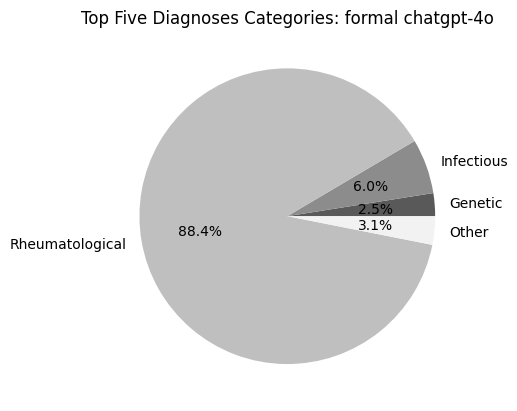

<Figure size 640x480 with 0 Axes>

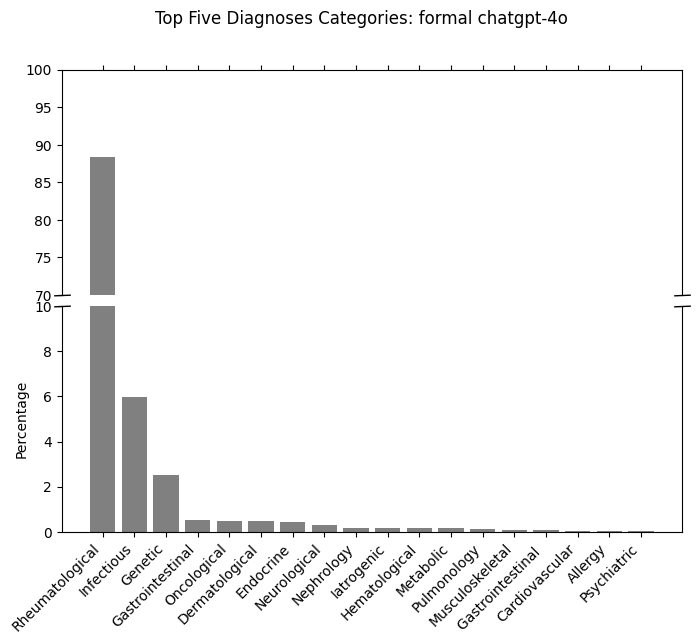

In [71]:
generate_charts_of_diagnosis_types(all_diseases, 'formal', 'chatgpt-4o', df_diag_codes)

{'Genetic': 395, 'Vascular': 4, 'Neurological': 151, 'Metabolic': 105, 'Psychiatric': 18, 'Oncological': 278, 'Musculoskeletal': 24, 'Nephrology': 111, 'Pulmonology': 52, 'Rheumatological': 15472, 'Infectious': 1513, 'Hematological': 153, 'Dermatological': 356, 'Gastrointestinal ': 81, 'Allergy': 38, 'Iatrogenic': 8, 'Cardiovascular': 213, 'Immunological': 1, 'Endocrine': 618, 'Gastrointestinal': 314}


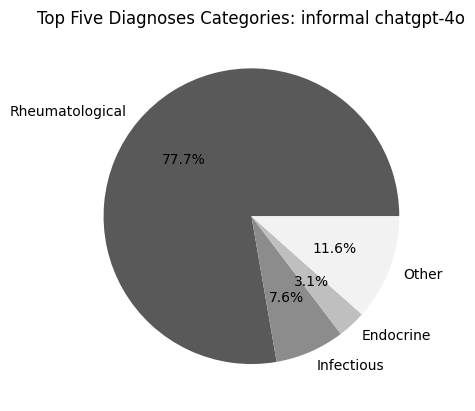

<Figure size 640x480 with 0 Axes>

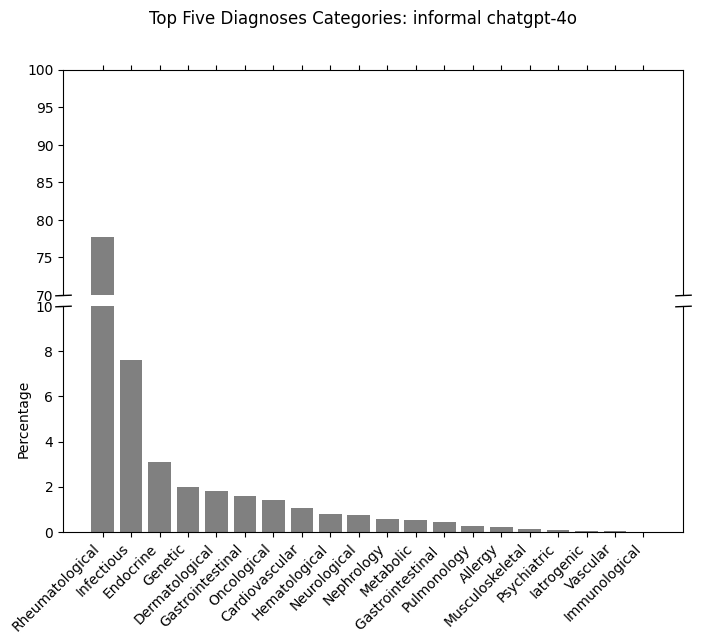

In [72]:
generate_charts_of_diagnosis_types(all_diseases, 'informal', 'chatgpt-4o', df_diag_codes)

{'Genetic': 126, 'Neurological': 57, 'Metabolic': 21, 'Oncological': 34, 'Dental': 2, 'Musculoskeletal': 3, 'Nephrology': 15, 'Pulmonology': 49, 'Rheumatological': 4105, 'Infectious': 231, 'Hematological': 10, 'Dermatological': 15, 'Gastrointestinal ': 45, 'Allergy': 1, 'Cardiovascular': 53, 'Iatrogenic': 1, 'Immunological': 2, 'Endocrine': 94, 'Gastrointestinal': 100}


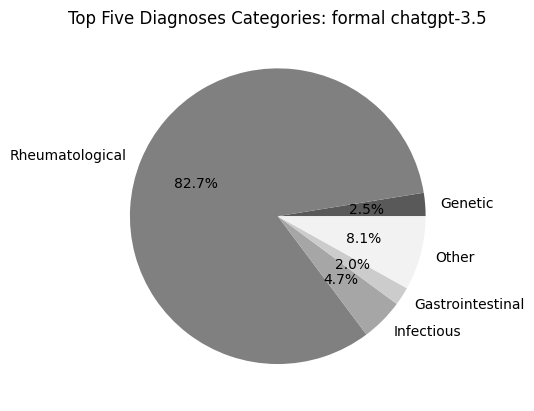

<Figure size 640x480 with 0 Axes>

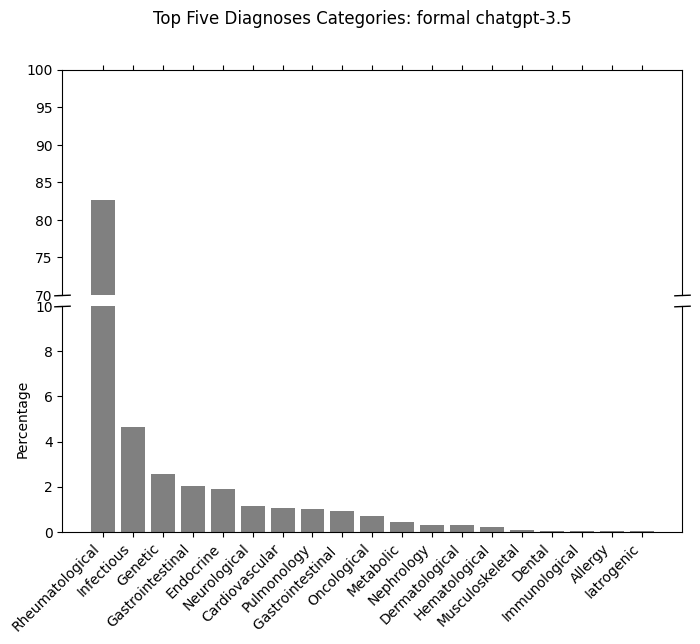

{'Genetic': 235, 'Vascular': 1, 'Neurological': 217, 'Metabolic': 176, 'Psychiatric': 40, 'Oncological': 304, 'Dental': 2, 'Musculoskeletal': 15, 'Nephrology': 168, 'Pulmonology': 270, 'Rheumatological': 13989, 'Gynecological': 3, 'Infectious': 1466, 'Hematological': 270, 'Dermatological': 208, 'Gastrointestinal ': 245, 'Allergy': 59, 'Cardiovascular': 333, 'Iatrogenic': 5, 'Immunological': 8, 'Endocrine': 1025, 'Gastrointestinal': 821}


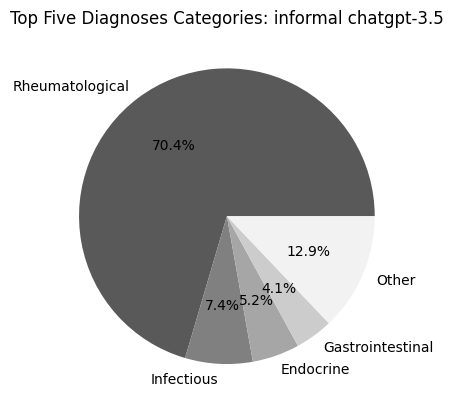

<Figure size 640x480 with 0 Axes>

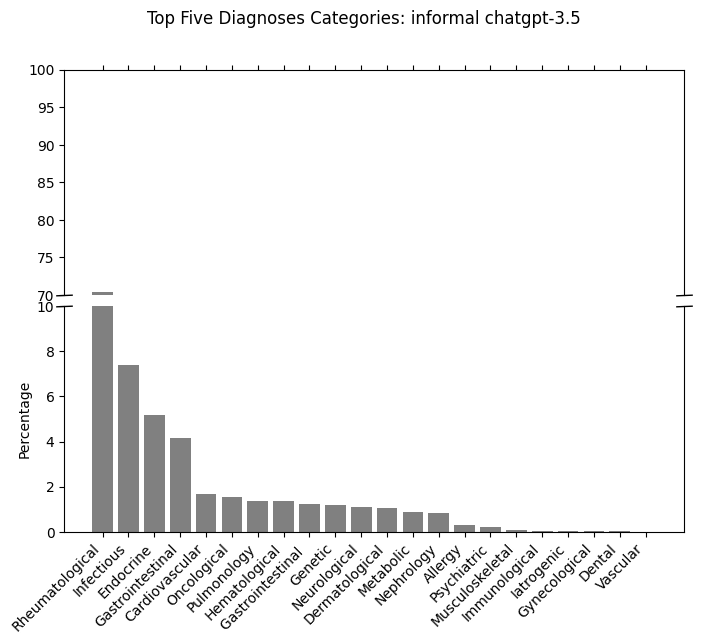

{'Oncological': 23, 'Genetic': 124, 'Infectious': 297, 'Allergy': 1, 'Iatrogenic': 8, 'Hematological': 7, 'Cardiovascular': 2, 'Dermatological': 23, 'Pulmonology': 6, 'Endocrine': 21, 'Neurological': 14, 'Metabolic': 7, 'Gastrointestinal': 25, 'Psychiatric': 1, 'Gastrointestinal ': 3, 'Musculoskeletal': 4, 'Nephrology': 9, 'Rheumatological': 4380}


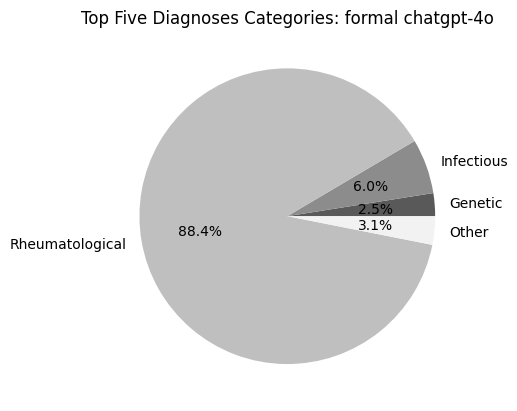

<Figure size 640x480 with 0 Axes>

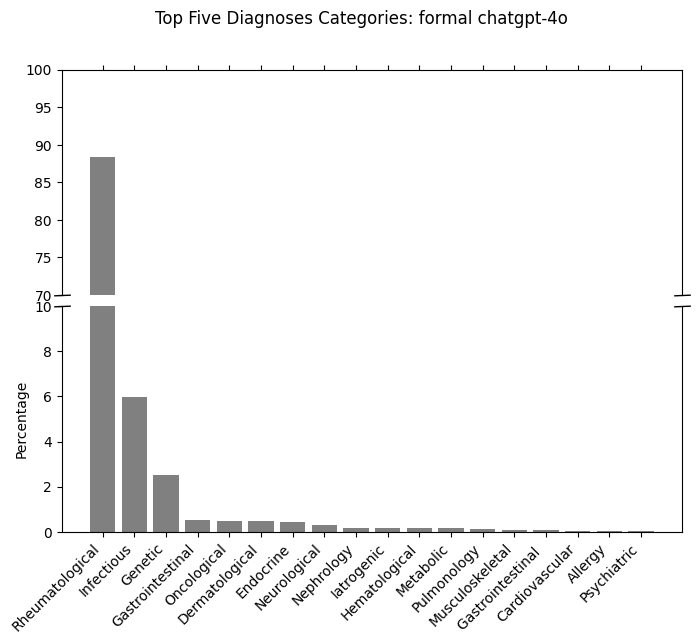

{'Genetic': 395, 'Vascular': 4, 'Neurological': 151, 'Metabolic': 105, 'Psychiatric': 18, 'Oncological': 278, 'Musculoskeletal': 24, 'Nephrology': 111, 'Pulmonology': 52, 'Rheumatological': 15472, 'Infectious': 1513, 'Hematological': 153, 'Dermatological': 356, 'Gastrointestinal ': 81, 'Allergy': 38, 'Iatrogenic': 8, 'Cardiovascular': 213, 'Immunological': 1, 'Endocrine': 618, 'Gastrointestinal': 314}


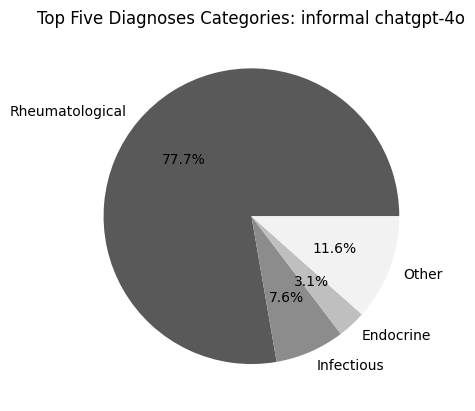

<Figure size 640x480 with 0 Axes>

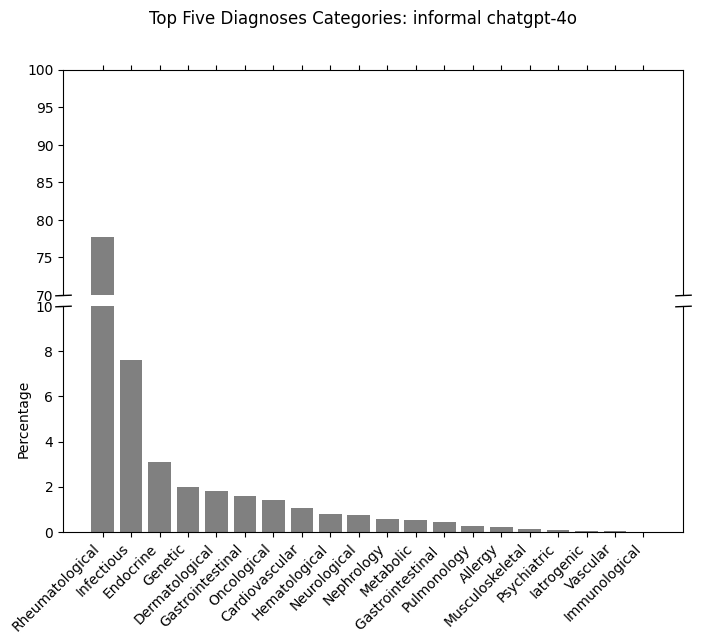

{'Genetic': 220, 'Neurological': 25, 'Metabolic': 34, 'Psychiatric': 1, 'Oncological': 130, 'Musculoskeletal': 3, 'Nephrology': 40, 'Pulmonology': 15, 'Rheumatological': 4176, 'Infectious': 199, 'Hematological': 7, 'Dermatological': 14, 'Gastrointestinal ': 4, 'Allergy': 2, 'Iatrogenic': 2, 'Cardiovascular': 9, 'Immunological': 2, 'Endocrine': 3, 'Gastrointestinal': 94}


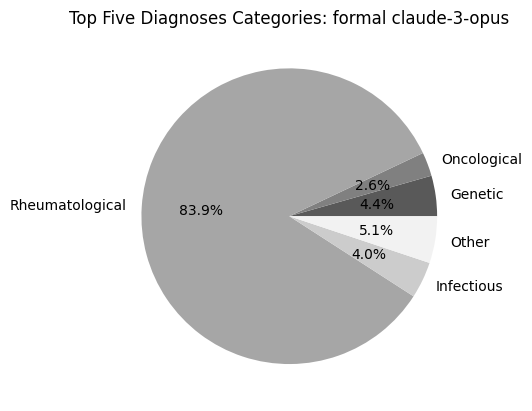

<Figure size 640x480 with 0 Axes>

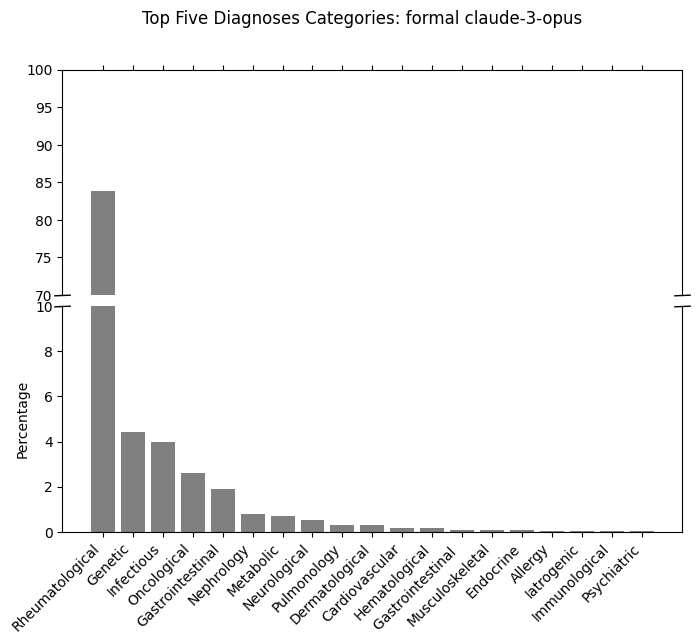

{'Genetic': 92, 'Neurological': 136, 'Metabolic': 199, 'Psychiatric': 17, 'Oncological': 858, 'Musculoskeletal': 38, 'Nephrology': 175, 'Pulmonology': 129, 'Trauma': 12, 'Rheumatological': 15316, 'Infectious': 783, 'Hematological': 172, 'Dermatological': 605, 'Gastrointestinal ': 183, 'Allergy': 82, 'Iatrogenic': 4, 'Cardiovascular': 347, 'Immunological': 9, 'Endocrine': 234, 'Gastrointestinal': 589}


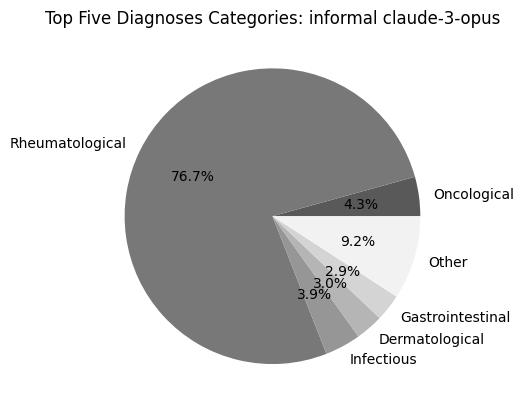

<Figure size 640x480 with 0 Axes>

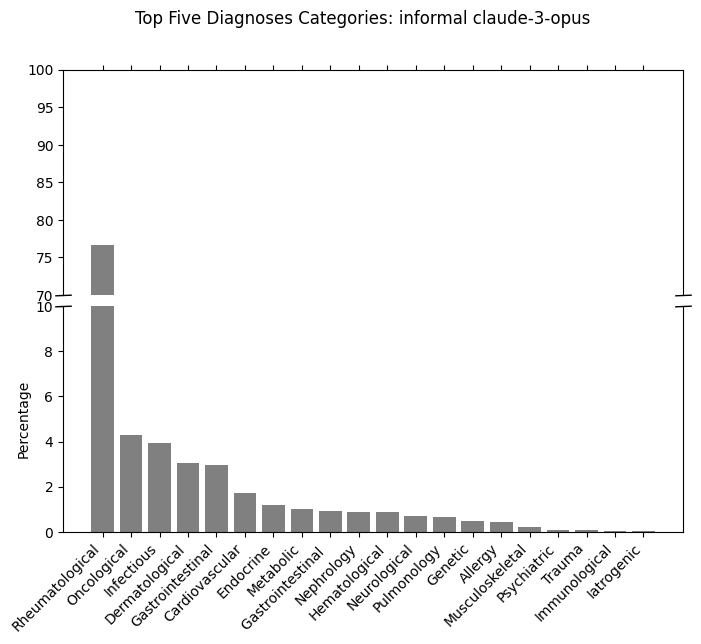

{'Oncological': 45, 'Genetic': 54, 'Infectious': 243, 'Iatrogenic': 21, 'Hematological': 30, 'Cardiovascular': 18, 'Dermatological': 3, 'Immunological': 44, 'Pulmonology': 2, 'Endocrine': 14, 'Neurological': 25, 'Metabolic': 6, 'Gastrointestinal': 14, 'Psychiatric': 1, 'Musculoskeletal': 6, 'Nephrology': 21, 'Rheumatological': 4413}


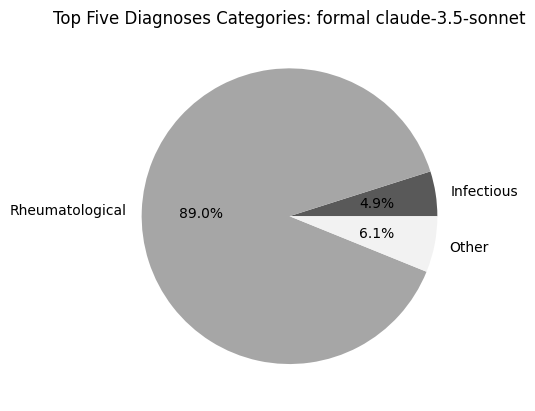

<Figure size 640x480 with 0 Axes>

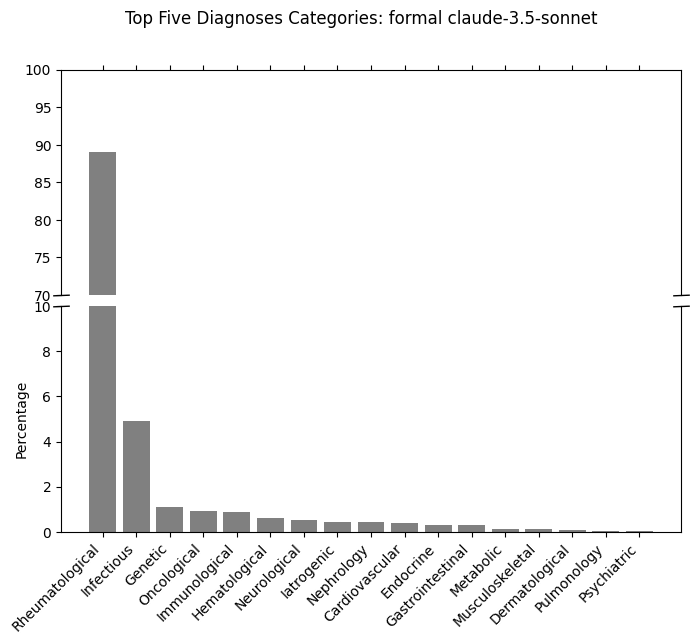

{'Genetic': 57, 'Neurological': 136, 'Metabolic': 197, 'Psychiatric': 48, 'Oncological': 438, 'Musculoskeletal': 41, 'Nephrology': 62, 'Pulmonology': 37, 'Rheumatological': 16084, 'Infectious': 1619, 'Hematological': 115, 'Dermatological': 249, 'Gastrointestinal ': 74, 'Allergy': 8, 'Iatrogenic': 55, 'Cardiovascular': 173, 'Immunological': 95, 'Endocrine': 225, 'Gastrointestinal': 247}


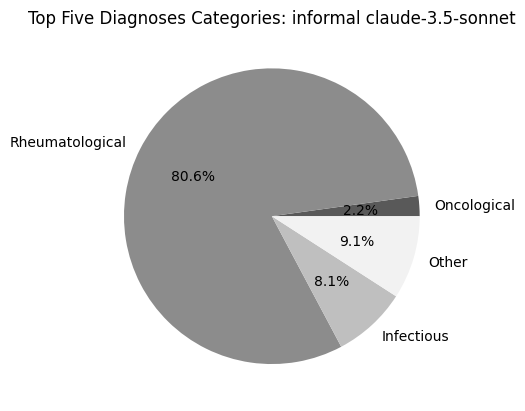

<Figure size 640x480 with 0 Axes>

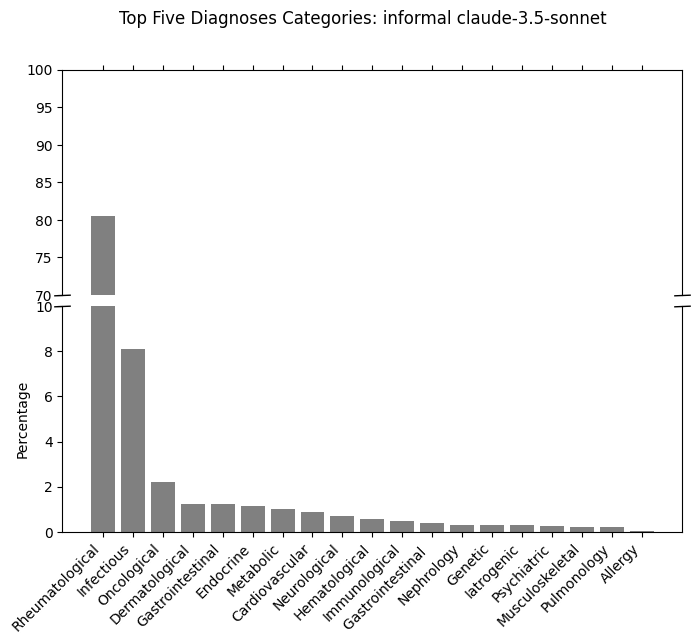

In [73]:
for mdl in all_models:
    for t in all_types:
        generate_charts_of_diagnosis_types(all_diseases, t, mdl, df_diag_codes)

In [74]:
all_responses = compute_diagnosis_code_for_top_k(disease, 'formal', 'chatgpt-4o', df_diag_codes)
freqs = get_frequencies(all_responses, lower=False)
print(freqs)
N = len(all_responses)
# Set a threshold for small values
threshold = int(0.02 * N)
# Filter out small values
filtered_data = {k: v for k, v in freqs.items() if v >= threshold}
total_filtered = sum([v for k, v in freqs.items() if v < threshold])
filtered_data['Other'] = total_filtered

{'Genetic': 113, 'Infectious': 9, 'Dermatological': 14, 'Pulmonology': 2, 'Endocrine': 4, 'Neurological': 10, 'Gastrointestinal': 3, 'Gastrointestinal ': 2, 'Musculoskeletal': 4, 'Nephrology': 4, 'Rheumatological': 1070}


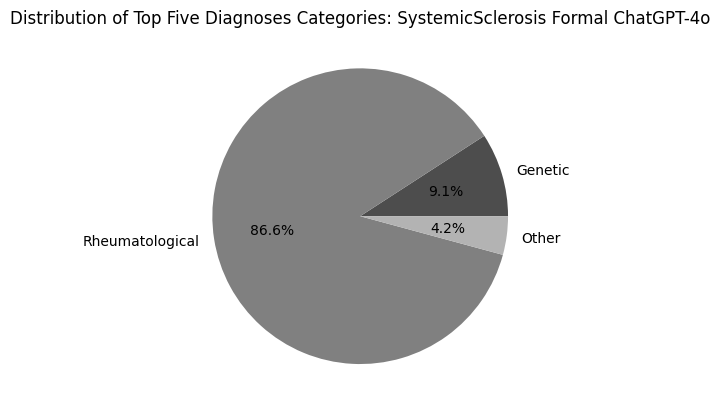

In [75]:


# Extract keys and values from the dictionary
labels = filtered_data.keys()
values = filtered_data.values()
n = len(labels)
gray_codes = np.linspace(0.3, 0.7, n)
    # Convert the NumPy array to a list of strings (required by plt.pie for colors)
gray_colors = [str(g) for g in gray_codes]

plt.pie(values, labels=labels, colors=gray_colors, autopct='%1.1f%%')
# Create the pie chart
#plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title(f'Distribution of Top Five Diagnoses Categories: {disease} Formal ChatGPT-4o')
#plt.savefig('results/top-five-categories-pie-SAMPLE.pdf', dpi=500, bbox_inches='tight')
plt.show()

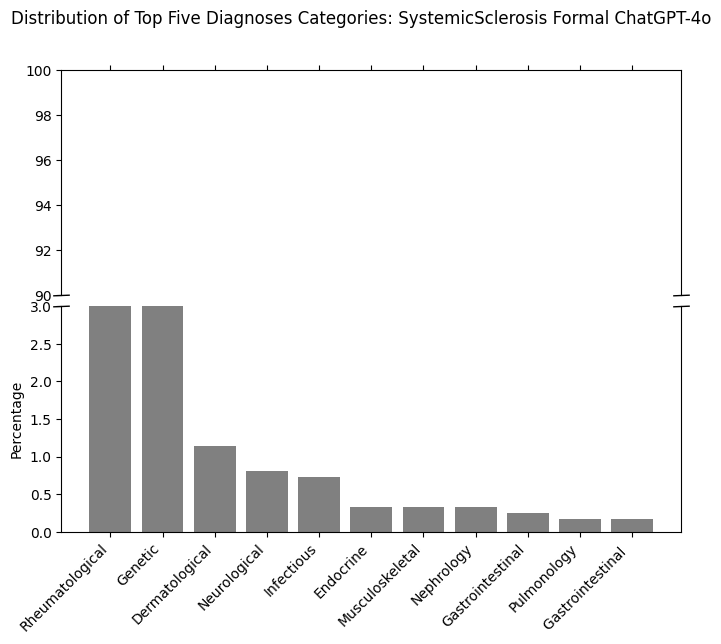

In [76]:
# Create the pie chart

# Extract keys and values from the dictionary
labels = freqs.keys()
values = freqs.values()
values_pct = [v/N*100.0 for v in values]

# 1. Combine labels and values into pairs
# This creates a list of tuples like [('A', 20), ('B', 50), ...]
combined_list = zip(labels, values_pct)
# 2. Sort the combined list in descending order
# The 'key=lambda x: x[1]' tells Python to sort based on the second item in each pair (the value)
# 'reverse=True' ensures the order is from highest to lowest
sorted_list = sorted(combined_list, key=lambda x: x[1], reverse=True)

# 3. Unzip the sorted list back into two separate lists
sorted_labels, sorted_values_pct = zip(*sorted_list)


# Rotate x-axis labels by 45 degrees
fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
#ax2.bar(categories, values, color='gray')
fig.suptitle(f'Distribution of Top Five Diagnoses Categories: {disease} Formal ChatGPT-4o')
ax2.set_ylim(90, 100) # Upper range


# Plot data on the bottom subplot (ax1)
#ax1.bar(categories, values, color='gray')
ax1.set_ylim(0, 3) # Lower range
plt.xticks(rotation=45, ha='right')  
  
ax1.bar(sorted_labels, sorted_values_pct, color='gray')
ax2.bar(sorted_labels, sorted_values_pct, color='gray')



# Hide spines and adjust ticks
ax2.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.xaxis.tick_top()
ax2.tick_params(labeltop=False)
ax1.xaxis.tick_bottom()

# Add "Break" Indicators (Optional but Recommended)
d = .04 # How big to make the diagonal lines in axes coordinates
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)


# Adjust Layout and Show Plot
fig.subplots_adjust(hspace=0.05)
plt.ylabel('Percentage')

#plt.savefig('results/top-five-categories-bar-SAMPLE.pdf', dpi=500, bbox_inches='tight')

plt.show()


# Print a spreadsheet for the "Biostats" people


In [77]:
def print_results_spreadsheet(disease,symp_type, model):
    # load the file
    fname = f'data/{disease}-{symp_type}-{model}.txt'
    print(f'data/{disease}-{symp_type}-{model}')
    all_patients = utils.process_file(fname)
    #print(len(all_patients))
    res_sheet = f'results/csv_sheets/{disease}-{symp_type}-{model}.csv'
    #print(res_sheet)
    outfile = open(res_sheet,'w')
    print('id, symptoms, diagnosis1, diagnosis2, diagnosis3, diagnosis4, diagnosis5', file=outfile)
    for (j,p) in enumerate(all_patients):
        #print(p.responses)
        print(f'{j},', file=outfile, end='')
        print(f'\"{';'.join(p.symptom_list)}\", ', file=outfile, end='')
        for l in range(1,6):
            if l in p.responses:
                (d, _, _) = p.responses[l]
                d_hat = d.replace(",",";")
                print(f'\"{d_hat}\", ', file=outfile, end='')
        print('', file=outfile)
    outfile.close()

In [78]:
print_results_spreadsheet('MCTD','formal','chatgpt-4o')

data/MCTD-formal-chatgpt-4o


In [79]:
for dis in all_diseases:
    for typ in all_types:
        for mdl in all_models:
            print_results_spreadsheet(dis, typ, mdl)

data/SLE-formal-chatgpt-3.5
data/SLE-formal-chatgpt-4o
data/SLE-formal-claude-3-opus
data/SLE-formal-claude-3.5-sonnet
data/SLE-informal-chatgpt-3.5
data/SLE-informal-chatgpt-4o
data/SLE-informal-claude-3-opus
data/SLE-informal-claude-3.5-sonnet
data/SystemicSclerosis-formal-chatgpt-3.5
data/SystemicSclerosis-formal-chatgpt-4o
data/SystemicSclerosis-formal-claude-3-opus
data/SystemicSclerosis-formal-claude-3.5-sonnet
data/SystemicSclerosis-informal-chatgpt-3.5
data/SystemicSclerosis-informal-chatgpt-4o
data/SystemicSclerosis-informal-claude-3-opus
data/SystemicSclerosis-informal-claude-3.5-sonnet
data/JDM-formal-chatgpt-3.5
data/JDM-formal-chatgpt-4o
data/JDM-formal-claude-3-opus
data/JDM-formal-claude-3.5-sonnet
data/JDM-informal-chatgpt-3.5
data/JDM-informal-chatgpt-4o
data/JDM-informal-claude-3-opus
data/JDM-informal-claude-3.5-sonnet
data/MCTD-formal-chatgpt-3.5
data/MCTD-formal-chatgpt-4o
data/MCTD-formal-claude-3-opus
data/MCTD-formal-claude-3.5-sonnet
data/MCTD-informal-chatgpt-

# Accuracy by Number of Symptoms

In [80]:
def compute_accuracy_by_number_of_symptoms(disease,symp_type, model, keywords_list):
    fname = f'data/{disease}-{symp_type}-{model}.txt'
    print(f'data/{disease}-{symp_type}-{model}')
    all_patients = utils.process_file(fname)
    # return a table/dictionary key == number of symptomes --> value (# cases, # top diagnosis correct, # top 3 correct, # top 5 correct)
    dic = {}
    for p in all_patients:
        k = len(p.symptom_list)+1
        top_symp_accurate = 1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(1)) else 0
        top3_symp_accurate = 1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(3)) else 0
        top5_symp_accurate = 1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(5)) else 0
        if k in dic.keys():
            (n_cases, t, t3, t5) = dic[k]
            dic[k] = (n_cases +1, t + top_symp_accurate, t3 + top3_symp_accurate, t5 +top5_symp_accurate)
        else:
            dic[k] = (1, top_symp_accurate, top3_symp_accurate, top5_symp_accurate)
    outfilename = f'results/{disease}-{symp_type}-{model}-accuracy-by-num-symptoms.csv'
    f = open(outfilename, 'w')
    print(f'# Symptoms, # cases, Pct. Top Diagnosis Accurate, Pct. Top 3 Diagnosis Accurate, Pct. Top 5 Diagnosis Accurate', file=f)
    for k in sorted(dic.keys()):
        (n_cases, top, top3, top5) = dic[k]
        assert n_cases >= 1
        print(f'{k}, {n_cases}, {top/n_cases*100.0}, {top3/n_cases*100.0}, {top5/n_cases*100.0}', file=f)
    f.close()
    return dic 
    

In [81]:
compute_accuracy_by_number_of_symptoms(disease, 'formal', 'chatgpt-3.5', keywords_list)

data/SystemicSclerosis-formal-chatgpt-3.5


{7: (1, 1, 1, 1),
 5: (45, 29, 44, 45),
 3: (75, 53, 69, 71),
 4: (94, 71, 92, 92),
 6: (13, 7, 13, 13),
 2: (20, 0, 13, 13),
 1: (1, 0, 0, 0)}

data/SLE-formal-chatgpt-3.5
data/SLE-formal-chatgpt-4o
data/SLE-formal-claude-3-opus
data/SLE-formal-claude-3.5-sonnet
data/SLE-informal-chatgpt-3.5
data/SLE-informal-chatgpt-4o
data/SLE-informal-claude-3-opus
data/SLE-informal-claude-3.5-sonnet
data/SystemicSclerosis-formal-chatgpt-3.5
data/SystemicSclerosis-formal-chatgpt-4o
data/SystemicSclerosis-formal-claude-3-opus
data/SystemicSclerosis-formal-claude-3.5-sonnet
data/SystemicSclerosis-informal-chatgpt-3.5
data/SystemicSclerosis-informal-chatgpt-4o
data/SystemicSclerosis-informal-claude-3-opus
data/SystemicSclerosis-informal-claude-3.5-sonnet
data/JDM-formal-chatgpt-3.5
data/JDM-formal-chatgpt-4o
data/JDM-formal-claude-3-opus
data/JDM-formal-claude-3.5-sonnet
data/JDM-informal-chatgpt-3.5
data/JDM-informal-chatgpt-4o
data/JDM-informal-claude-3-opus
data/JDM-informal-claude-3.5-sonnet
data/MCTD-formal-chatgpt-3.5
data/MCTD-formal-chatgpt-4o
data/MCTD-formal-claude-3-opus
data/MCTD-formal-claude-3.5-sonnet
data/MCTD-informal-chatgpt-

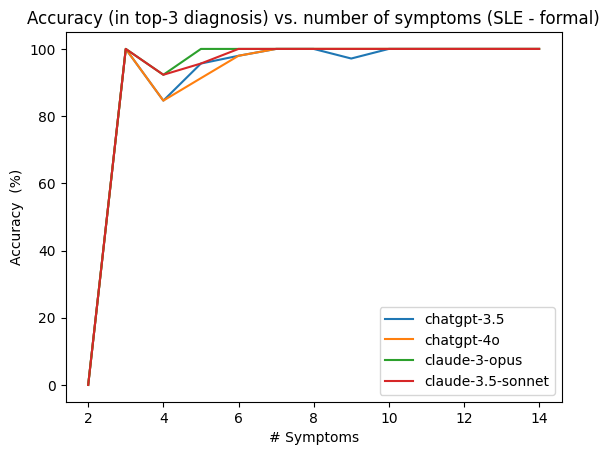

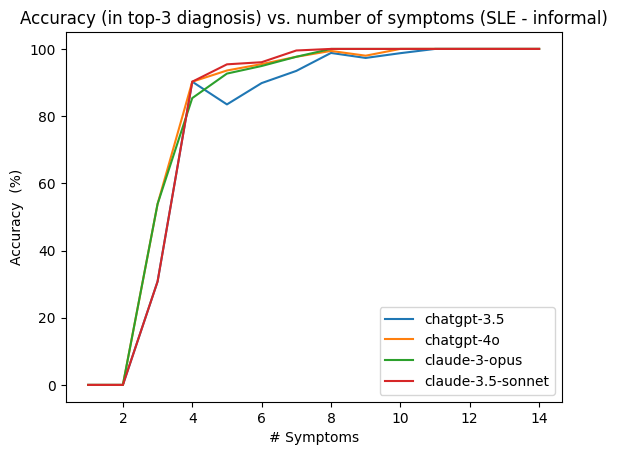

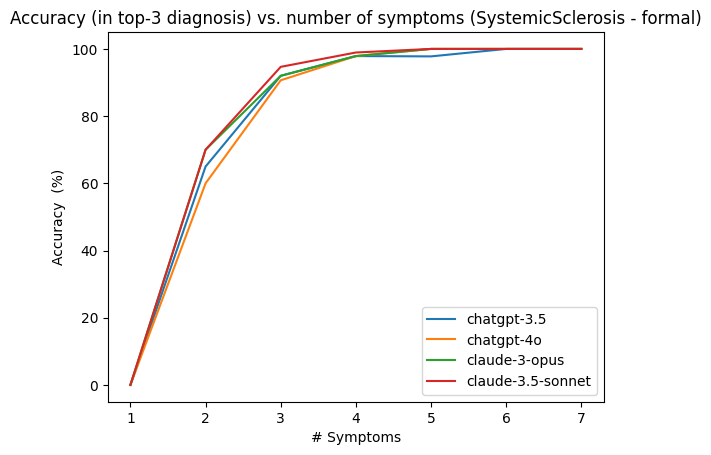

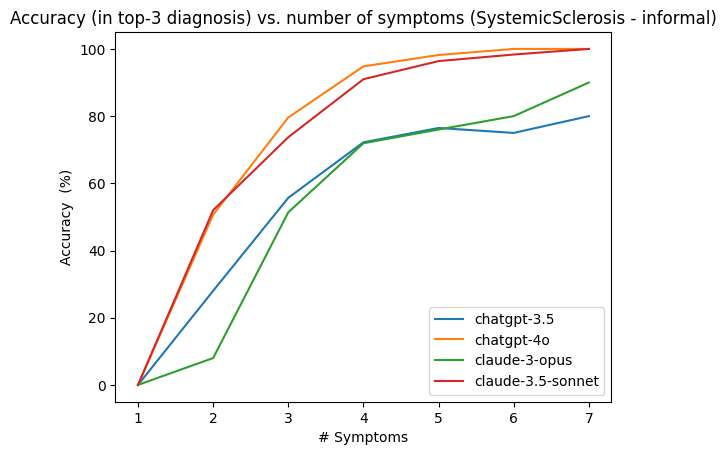

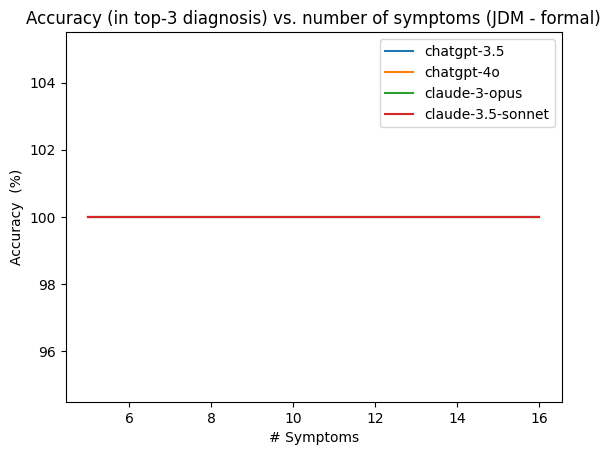

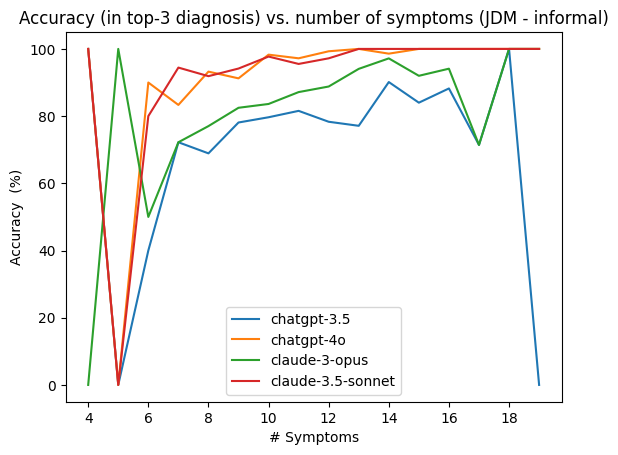

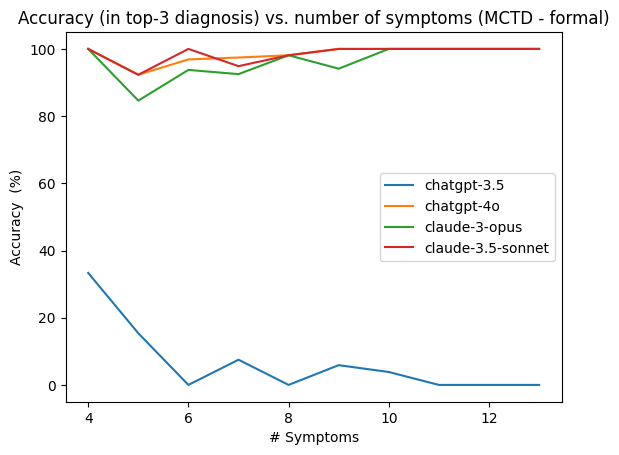

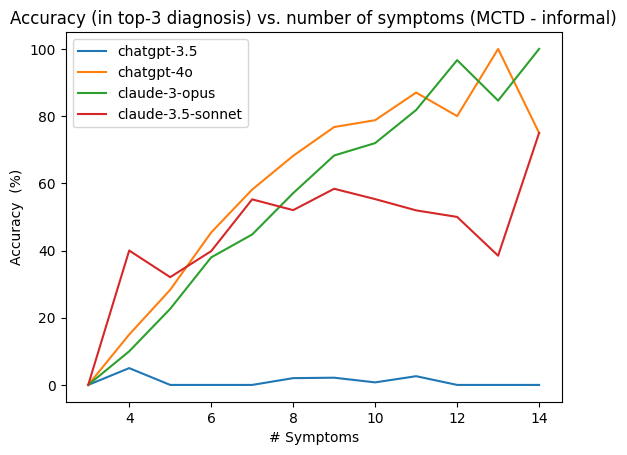

In [82]:
from matplotlib import pyplot as plt

for (dis, keywords) in zip(all_diseases, all_keywords):
    for typ in all_types:
        f = plt.figure()
        for mdl in all_models:
            dic = compute_accuracy_by_number_of_symptoms(dis, typ, mdl, keywords)
            k_list = []
            t3_list = []
            for k in sorted(dic.keys()):
                (n_cases, _, t3, _) = dic[k]
                k_list.append(k)
                t3_list.append(t3/n_cases*100.0)
            plt.plot(k_list, t3_list, label=f'{mdl}')
        plt.title(f'Accuracy (in top-3 diagnosis) vs. number of symptoms ({dis} - {typ})')
        plt.xlabel('# Symptoms')
        plt.ylabel('Accuracy  (%)')
        plt.legend()
        plt.savefig(f'results/{dis}-{typ}-accuracy-by-num-symptoms.pdf', bbox_inches='tight', dpi=500)